In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
import itertools
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance, plot_tree
import itertools

D:\Program Files\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Train/Test Split
X = pd.read_csv("X_re.csv")
y = pd.read_csv("y_re.csv")    

In [3]:
y=y.replace(1,0)
y=y.replace(2,1)
y=y.replace(3,2)

In [4]:
from sklearn.model_selection import train_test_split

# split our data
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [5]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    fig, ax = plt.subplots(figsize=(12, 6))
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    #class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.colorbar()
    plt.show()

Train: 0.6040847180682555
Test: 0.6006207383158081
              precision    recall  f1-score   support

       Fatal       0.62      0.74      0.67    933512
     Serious       0.56      0.41      0.47    933512
      Slight       0.62      0.67      0.64    933512

    accuracy                           0.60   2800536
   macro avg       0.60      0.60      0.60   2800536
weighted avg       0.60      0.60      0.60   2800536

              precision    recall  f1-score   support

       Fatal       0.61      0.73      0.67    233378
     Serious       0.55      0.41      0.47    233378
      Slight       0.62      0.66      0.64    233378

    accuracy                           0.60    700134
   macro avg       0.59      0.60      0.59    700134
weighted avg       0.59      0.60      0.59    700134



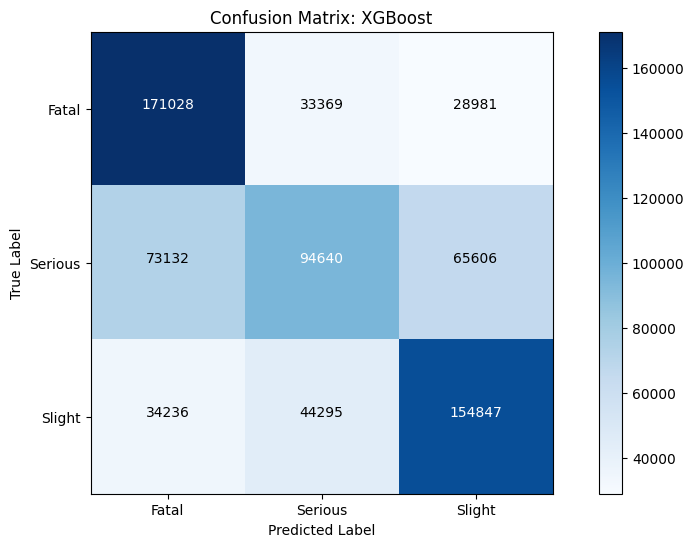

In [6]:
from xgboost import XGBClassifier, plot_importance, plot_tree
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

print("Train:", xgb.score(X_train, y_train))
print("Test:", xgb.score(X_test, y_test))

xgb_y_preds_train = xgb.predict(X_train)
print(classification_report(y_train, xgb_y_preds_train, target_names=['Fatal', 'Serious','Slight']))

xgb_y_preds_test = xgb.predict(X_test)
print(classification_report(y_test, xgb_y_preds_test, target_names=['Fatal', 'Serious','Slight']))

plot_cf(y_test, xgb_y_preds_test, model_name='XGBoost', class_names=['Fatal', 'Serious','Slight'])